# System Identification (Estimating Parameters from Data)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy.optimize import curve_fit

## ## Generate synthetic test data from a "true" system

In [ ]:
true_K = 1.2    # True gain
true_tau = 0.8  # True time constant (seconds)
true_sys = ctrl.TransferFunction([true_K], [true_tau, 1])

# Time vector and input signal
t = np.linspace(0, 5, 500)
u = np.ones_like(t)  # Step input

# Simulate response with noise
t, y_true = ctrl.forced_response(true_sys, t, u)
np.random.seed(42)
noise = 0.02 * np.random.randn(len(t))
y_measured = y_true + noise

## ## System Identification

True parameters: K = 1.200, τ = 0.800
Estimated: K = 1.201 ± 0.001, τ = 0.802 ± 0.004


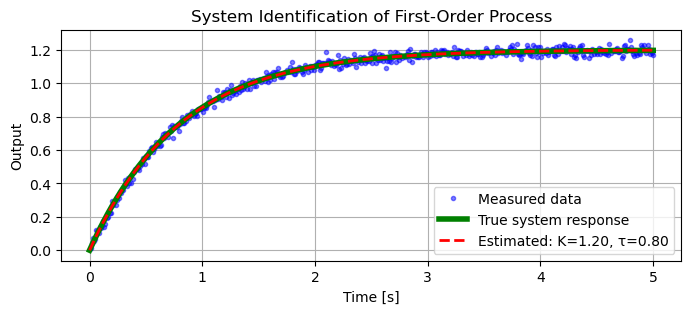

In [17]:
# Define model structure (first-order system)
def first_order_step_response(t, K, tau):
    """Theoretical first-order step response"""
    return K * (1 - np.exp(-t/tau))

# Perform curve fitting to estimate parameters
popt, pcov = curve_fit(first_order_step_response, t, y_measured, p0=[1, 1])
K_est, tau_est = popt
K_err, tau_err = np.sqrt(np.diag(pcov))

print(f"True parameters: K = {true_K:.3f}, τ = {true_tau:.3f}")
print(f"Estimated: K = {K_est:.3f} ± {K_err:.3f}, τ = {tau_est:.3f} ± {tau_err:.3f}")

# Create estimated transfer function
est_sys = ctrl.TransferFunction([K_est], [tau_est, 1])

# Validate the model
t_val, y_val = ctrl.forced_response(est_sys, t, u)

plt.figure(figsize=(8, 3))
plt.plot(t, y_measured, 'b.', alpha=0.5, label='Measured data')
plt.plot(t, y_true, 'g-', linewidth=4, label='True system response')
plt.plot(t_val, y_val, 'r--', linewidth=2, label=f'Estimated: K={K_est:.2f}, τ={tau_est:.2f}')
plt.title('System Identification of First-Order Process')
plt.xlabel('Time [s]')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

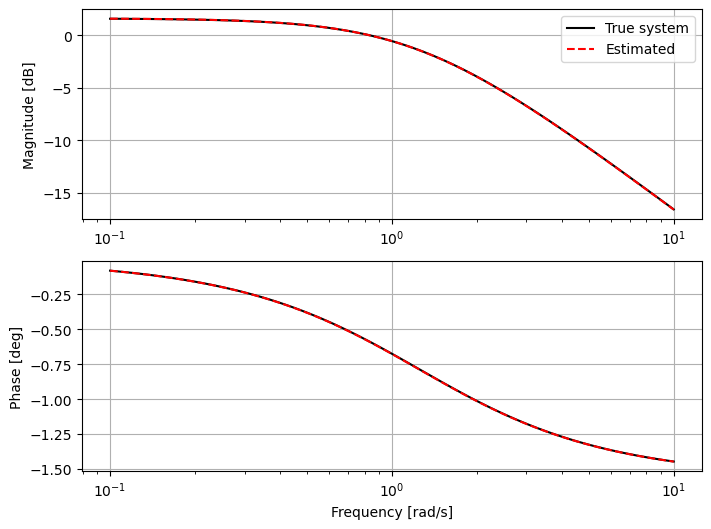

In [19]:
# Frequency domain validation (optional)
w = np.logspace(-1, 1, 100)
mag_true, phase_true, _ = ctrl.bode(true_sys, w, plot=False)
mag_est, phase_est, _ = ctrl.bode(est_sys, w, plot=False)

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, 20*np.log10(mag_true), 'k-', label='True system')
plt.semilogx(w, 20*np.log10(mag_est), 'r--', label='Estimated')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(w, phase_true, 'k-', label='True system')
plt.semilogx(w, phase_est, 'r--', label='Estimated')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [deg]')
plt.grid(True)
plt.show()